In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

training_set = train_datagen.flow_from_directory(
        'Dataset/Training',
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical')

Found 5712 images belonging to 4 classes.


In [3]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_set = validation_datagen.flow_from_directory(
        'Dataset/validation',
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        shuffle = False)

Found 1239 images belonging to 4 classes.


## Building the CNN :
##### Customising the AlexNET architecture for better result. Here we have used strides=4 in the 3rd,4th and 5th Convolution layers and omitted the last 3rd Pooling Layer (Max) from the architecture, to acheive more efficiency by experiment. (Which is different from the classic AlexNET model)

In [4]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, padding='same', activation="relu", input_shape=[224,224,3]))
# cnn.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization)) # Normalisation
tf.keras.layers.BatchNormalization()

# Pooling Layer (Max Pooling)
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=3, strides=2))

# 2nd Convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=5, strides = 4, padding='same', activation="relu"))
# cnn.add(tf.keras.layers.Lambda(tf.nn.local_response_normalization)) # Normalisation
tf.keras.layers.BatchNormalization()

# 2nd Pooling Layer (Max Pooling)
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=3, strides=2))

# Convolutional Layer 3
cnn.add(tf.keras.layers.Conv2D(filters = 384, kernel_size = 3, strides=4, padding='same', activation='relu'))
    
# Convolutional Layer 4
cnn.add(tf.keras.layers.Conv2D(filters = 384, kernel_size = 3, strides=4, padding='same', activation='relu'))
    
# Convolucnnl Layer 5
cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, strides=4, padding='same', activation='relu'))

# Flattening layer
cnn.add(tf.keras.layers.Flatten())

# Full Connection
cnn.add(tf.keras.layers.Dense(units=4096,activation="relu")) # 1st Hidden layer
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Dense(units=4096,activation="relu")) # 2nd Hidden layer
cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Dense(units=4,activation="softmax")) # Output Layer

# Compiling the CNN :
cnn.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])

## Training the Model :

In [5]:
# Training and Evaluating the CNN :
history = cnn.fit(x = training_set, validation_data = validation_set, epochs=25)

Epoch 1/25


90/90 [==============================] - 286s 3s/step - loss: 1.2068 - accuracy: 0.3974 - val_loss: 1.0304 - val_accuracy: 0.5069
Epoch 2/25
90/90 [==============================] - 157s 2s/step - loss: 0.7053 - accuracy: 0.7152 - val_loss: 0.6546 - val_accuracy: 0.7676
Epoch 3/25
90/90 [==============================] - 155s 2s/step - loss: 0.4704 - accuracy: 0.8333 - val_loss: 0.5010 - val_accuracy: 0.8152
Epoch 4/25
90/90 [==============================] - 166s 2s/step - loss: 0.3436 - accuracy: 0.8878 - val_loss: 0.4550 - val_accuracy: 0.8305
Epoch 5/25
90/90 [==============================] - 155s 2s/step - loss: 0.2792 - accuracy: 0.9046 - val_loss: 0.3872 - val_accuracy: 0.8394
Epoch 6/25
90/90 [==============================] - 154s 2s/step - loss: 0.2153 - accuracy: 0.9308 - val_loss: 0.3220 - val_accuracy: 0.8862
Epoch 7/25
90/90 [==============================] - 155s 2s/step - loss: 0.1975 - accuracy: 0.9357 - val_loss: 0.3301 - val_accuracy: 0.8773
Epoch 8/25


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
        'Dataset/test',
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        shuffle=False)

Found 72 images belonging to 4 classes.


In [7]:
import numpy as np

y_pred =cnn.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_set.classes
print(np.concatenate((y_true.reshape(len(y_true),1),y_pred.reshape(len(y_pred),1)),axis=1))

2/2 [==============================] - 1s 67ms/step
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]
 [3 3]]


## Evaluating the Model :

In [8]:
# Confusion Matrix :
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
print(cm)

[[18  0  0  0]
 [ 0 14  4  0]
 [ 0  0 18  0]
 [ 0  0  0 18]]


In [9]:
# Accuracy :
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true,y_pred)
print(f"The Accuracy of the model is : {accuracy*100:.2f}%")

The Accuracy of the model is : 94.44%


## Visualisation of the Model, for perfect Evaluation :

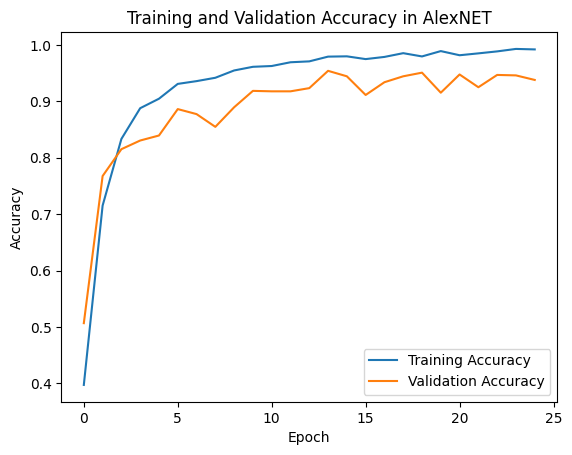

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy in AlexNET')
plt.show()

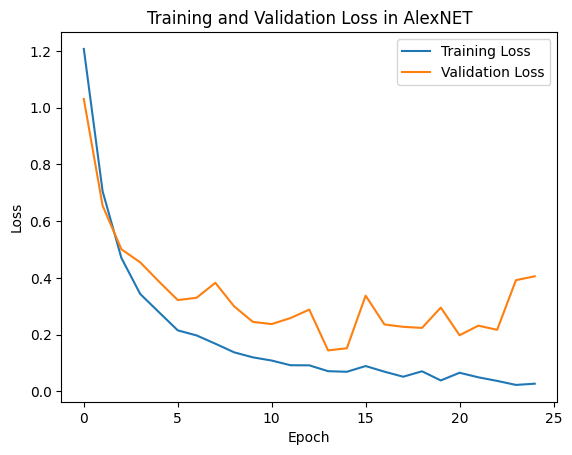

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss in AlexNET')
plt.show()

In [12]:
cnn.save("ml_model")

INFO:tensorflow:Assets written to: ml_model\assets


INFO:tensorflow:Assets written to: ml_model\assets
